## Project:  SQL-Based Data Cleaning & Transformation for Uber Revenue Analysis

###  Project Overview
#### In this project, I cleaned, transformed, and augmented an Uber revenue dataset by applying SQL and Python-based data processing techniques. The goal was to ensure data quality, improve usability, and generate meaningful insights by integrating additional customer segmentation data.

###  Project Goals
##### ✔ Understand & Define the Dataset – Identify key measures, dimensions, and critical columns.
##### ✔ Perform Data Cleaning – Fix formatting, ensure consistency, and remove duplicates.
##### ✔ Handle Missing & Unusable Data – Make informed decisions on missing values.
##### ✔ Augment Data with New Features – Create additional calculated columns for deeper analysis.
##### ✔ Enhance Dataset with External Data – Blend Uber revenue data with customer demographics.
##### ✔ Prepare Data for Analysis & Reporting – Make the dataset structured, complete, and ready for insights.

###  Datasets Used
##### 1️⃣ Uber Revenue Data – Contains ride transactions, pickup locations, and fare details.
##### 2️⃣ Customer Segmentation Data – Includes customer demographics and income segments.

### Step 1: Conceptualize (Understanding of the Data)

#### 1A: Identify Grain, Measures, and Dimensions
#### 💡 Goal: Understand what each row represents, the key numerical values, and important categories.

In [1]:
import pandas as pd

In [2]:
# i first load the files
uber_df = pd.read_csv(r"C:\Users\K A L K I D A N\OneDrive\Desktop\projects\UberRequestData.csv")
retail_df = pd.read_excel(r"C:\Users\K A L K I D A N\OneDrive\Desktop\projects\OnlineRetail.xlsx")

# check if it display first few rows to get an overview
print("\nUber Data Sample:")
print(uber_df.head())

print("\nOlineRetail Data Sample:")
print(retail_df.head())


Uber Data Sample:
   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  

OlineRetail Data Sample:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WA

In [3]:
# to Check column names and data types
print("\nColumn Data Types in Uber Data:")
print(uber_df.dtypes)

print("\nColumn Data Types in Customer Data:")
print(retail_df.dtypes)


Column Data Types in Uber Data:
Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

Column Data Types in Customer Data:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [4]:
# Identify unique values in categorical columns
categorical_cols = ["Status", "Pickup point"]  # Match exact case & spacing

# find which ones are valid columns
valid_cols = [col for col in categorical_cols if col in uber_df.columns or col in retail_df.columns]
print(f"Valid categorical columns: {valid_cols}")

# Print unique values only for existing columns
for col in valid_cols:
    if col in uber_df.columns:
        print(f"\nUnique Values in {col} (Uber Data): {uber_df[col].dropna().unique().tolist()}")
    elif col in retail_df.columns:
        print(f"\nUnique Values in {col} (OnlineRetail Data): {retail_df[col].dropna().unique().tolist()}")


Valid categorical columns: ['Status', 'Pickup point']

Unique Values in Status (Uber Data): ['Trip Completed', 'Cancelled', 'No Cars Available']

Unique Values in Pickup point (Uber Data): ['Airport', 'City']


In [5]:
print("Uber DataFrame Columns:", list(uber_df.columns))
print("Retail DataFrame Columns:", list(retail_df.columns))


Uber DataFrame Columns: ['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp']
Retail DataFrame Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


##### 📌 Key Questions to Answer:
###### 1️⃣ What does each row represent? (Grain)
###### 2️⃣ What are the most important measures (quantitative values)?
###### 3️⃣ What are the key dimensions (categorical values)?



#### 1B Identify Critical vs. Non-Critical Columns
#### 💡 Goal: Find out which columns must be high quality (~80% complete) for analysis.

In [6]:
# Checking missing value percentages
print("\nMissing Values Percentage in Uber Data:")
print(uber_df.isnull().sum() / len(uber_df) * 100)

print("\nMissing Values Percentage in Customer Data:")
print(retail_df.isnull().sum() / len(retail_df) * 100)



Missing Values Percentage in Uber Data:
Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

Missing Values Percentage in Customer Data:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


##### 📌 Key Questions to Answer:
###### 1️⃣ Which columns must be at least 80% complete?
###### 2️⃣ Which columns can be ignored or dropped?

### 1C: Understand Column Definitions
#### 💡 Goal: Define what each important column represents.
##### ✅ Uber Data Sample
###### Request id → Unique identifier for each ride request
###### Pickup point → Location where the ride starts (Airport or City)
###### Driver id → Unique identifier for the Uber driver
###### Status → Final state of the ride (Trip Completed, Canceled, etc.)
###### Request timestamp → Date and time when the ride request was made (inconsistent format)
###### Drop timestamp → Date and time when the ride was completed or canceled (inconsistent format)

##### 📌 Issues to Fix:
##### * Standardize timestamps
##### * Convert Driver id to integer
##### * Verify unique values in Pickup point
####


##### ✅ Online Retail Data Sample (Before Cleaning)
###### InvoiceNo → Unique identifier for each transaction
###### StockCode → Unique identifier for the purchased item
###### Description → Name of the purchased product
###### Quantity → Number of units sold per transaction
###### InvoiceDate → Date and time when the transaction occurred (formatted correctly)
###### UnitPrice → Price per unit of the purchased item
###### CustomerID → Unique identifier for the customer (should be integer)
###### Country → Country where the transaction took place

##### 📌 Issues to Fix:
##### * Convert CustomerID to integer
##### * Extract time components from InvoiceDate (Hour, Day, Month)
##### * Ensure StockCode remains a string (categorical)






#### 📌 Step 2: Locate Solvable Issues (Fix Data Formatting & Quality)
#### 💡 Goal: Clean up formatting, consistency, and duplicates.

### 2A: Fix Formatting Issues
#### 💡 Goal: Convert dates to proper datetime format and Standardize text case

In [7]:
# Convert timestamp columns to datetime format, to ensures date columns are in the correct format for time-based analysis.
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'], errors='coerce')
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'], errors='coerce')

# Standardize text format (convert to lowercase)
uber_df['Pickup point'] = uber_df['Pickup point'].str.lower()

retail_df['Country'] = retail_df['Country'].str.lower() 

In [8]:
print("Uber DataFrame Columns:", list(uber_df.columns))


Uber DataFrame Columns: ['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp']


In [9]:
print("Retail DataFrame Columns:", list(retail_df.columns))


Retail DataFrame Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


### 2B: Ensure Consistency in Categories

In [10]:
# Fix inconsistent categories (incase)
uber_df['Status'] = uber_df['Status'].replace({'completed': 'Completed', 'canceled ': 'Canceled'})


### 2C: Remove Duplicates

In [11]:
# Remove duplicate rows
uber_df.drop_duplicates(inplace=True)
retail_df.drop_duplicates(inplace=True)


#### 📌 Step 3: Evaluate Unsolvable Issues (Handle Missing or Unusable Data)
#### 💡 Goal: Decide whether to keep, fix, or drop missing values.

In [12]:

 # Check missing values percentage
 missing_uber = uber_df.isnull().sum() / len(uber_df) * 100
 missing_retail = retail_df.isnull().sum() / len(retail_df) * 100

 print("\nMissing Values in Uber Data:")
 print(missing_uber[missing_uber > 0])  # Show only columns with missing data

 print("\nMissing Values in Online Retail Data:")
 print(missing_retail[missing_retail > 0])

# Drop columns with >70% missing values
uber_df = uber_df.drop(columns=[col for col in missing_uber.index if missing_uber[col] > 70])
retail_df = retail_df.drop(columns=[col for col in missing_retail.index if missing_retail[col] > 70])

# Rename columns for consistency
uber_df = uber_df.rename(columns={'Request timestamp': 'request_time'})
retail_df = retail_df.rename(columns={'InvoiceDate': 'invoice_date'})

# Convert timestamps to datetime format safely
uber_df['request_time'] = pd.to_datetime(uber_df['request_time'], errors='coerce')
retail_df['invoice_date'] = pd.to_datetime(retail_df['invoice_date'], errors='coerce')

# Fill missing timestamps with the most common value
uber_df.loc[:, 'request_time'] = uber_df['request_time'].fillna(uber_df['request_time'].mode()[0])
retail_df.loc[:, 'invoice_date'] = retail_df['invoice_date'].fillna(retail_df['invoice_date'].mode()[0])

# Drop rows where CustomerID is missing in retail data (since it's important for segmentation)
retail_df = retail_df.dropna(subset=['CustomerID'])

# Check final missing values
print("\nRemaining Missing Values in Uber Data:")
print(uber_df.isnull().sum())

print("\nRemaining Missing Values in Online Retail Data:")
print(retail_df.isnull().sum())



Missing Values in Uber Data:
Driver id            39.288362
Request timestamp    60.355819
Drop timestamp       82.950334
dtype: float64

Missing Values in Online Retail Data:
Description     0.270945
CustomerID     25.163377
dtype: float64

Remaining Missing Values in Uber Data:
Request id         0
Pickup point       0
Driver id       2650
Status             0
request_time       0
dtype: int64

Remaining Missing Values in Online Retail Data:
InvoiceNo       0
StockCode       0
Description     0
Quantity        0
invoice_date    0
UnitPrice       0
CustomerID      0
Country         0
dtype: int64


In [13]:
# Fill missing Driver ID with most common value (mode)
most_common_driver = uber_df['Driver id'].mode()[0]
uber_df['Driver id'] = uber_df['Driver id'].fillna(most_common_driver)

# OR Alternative: Fill missing Driver ID with a placeholder (e.g., -1)
# uber_df['Driver id'] = uber_df['Driver id'].fillna(-1)

# Check if missing values are gone
print("\nFinal Missing Values in Uber Data:")
print(uber_df.isnull().sum())



Final Missing Values in Uber Data:
Request id      0
Pickup point    0
Driver id       0
Status          0
request_time    0
dtype: int64


#### 📝 Documentation Summary:
#### ✅ Retail Data: No more missing values.
#### ✅ Uber Data: Only Driver id had missing values (39.29%), which we filled with the most common value.
##### Now, all missing data issues are solved! 🎉

In [14]:
print(uber_df.columns)  #  Check the actual column names in my data


Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'request_time'], dtype='object')


In [15]:
print(uber_df.dtypes)  #  See column names and their data types


Request id               int64
Pickup point            object
Driver id              float64
Status                  object
request_time    datetime64[ns]
dtype: object


In [16]:
print(uber_df.columns)


Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'request_time'], dtype='object')


#### Step 4 - Augmentation (Creating Additional Data for Better Insights)
 ##### I Created:
##### 1️⃣ Create new columns through calculations.
##### 2️⃣ Merge Uber & Retail data to provide more context.
##### 3️⃣ Add supplementary information (e.g., segment customers, categorize trips).

##### 1️⃣ Creating New Columns
###### I created:
#####  Uber Data:-
###### trip_duration:- Time taken for a ride (Drop Time - Request Time).
###### ride_category:- Categorizing trip duration into "Short", "Medium", "Long".
###### Retail Data:-
###### TotalPrice:- (Quantity * UnitPrice) to get total transaction value.

In [17]:

# Ensure timestamps are in datetime format
uber_df['request_time'] = pd.to_datetime(uber_df['request_time'])
retail_df['invoice_date'] = pd.to_datetime(retail_df['invoice_date'])

# Create new time-based columns
uber_df['request_hour'] = uber_df['request_time'].dt.hour
uber_df['request_day'] = uber_df['request_time'].dt.day
uber_df['request_month'] = uber_df['request_time'].dt.month

retail_df['invoice_hour'] = retail_df['invoice_date'].dt.hour
retail_df['invoice_day'] = retail_df['invoice_date'].dt.day
retail_df['invoice_month'] = retail_df['invoice_date'].dt.month

# Identify peak hours (assuming peak hours are 7-9 AM & 5-7 PM)
def classify_peak(hour):
    return "Peak" if hour in [7, 8, 9, 17, 18, 19] else "Non-Peak"

uber_df['peak_hour'] = uber_df['request_hour'].apply(classify_peak)

# Create TotalPrice column for retail data
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

# Classify customers based on their total spending
customer_spending = retail_df.groupby('CustomerID')['TotalPrice'].sum()

def categorize_customer(spend):
    if spend > 500: return "High Spender"
    elif spend > 100: return "Mid Spender"
    else: return "Low Spender"

customer_segments = customer_spending.apply(categorize_customer)
retail_df = retail_df.merge(customer_segments.rename("CustomerSegment"), on="CustomerID", how="left")

# Preview changes
print("\nUber Data with New Columns:")
print(uber_df[['request_time', 'request_hour', 'request_day', 'request_month', 'peak_hour']].head())

print("\nRetail Data with New Columns:")
print(retail_df[['Quantity', 'UnitPrice', 'TotalPrice', 'CustomerSegment']].head())



Uber Data with New Columns:
         request_time  request_hour  request_day  request_month peak_hour
0 2016-11-07 11:51:00            11            7             11  Non-Peak
1 2016-11-07 17:57:00            17            7             11      Peak
2 2016-12-07 09:17:00             9            7             12      Peak
3 2016-12-07 21:08:00            21            7             12  Non-Peak
4 2016-11-07 08:37:00             8            7             11      Peak

Retail Data with New Columns:
   Quantity  UnitPrice  TotalPrice CustomerSegment
0         6       2.55       15.30    High Spender
1         6       3.39       20.34    High Spender
2         8       2.75       22.00    High Spender
3         6       3.39       20.34    High Spender
4         6       3.39       20.34    High Spender


In [18]:
print(uber_df.columns)


Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'request_time',
       'request_hour', 'request_day', 'request_month', 'peak_hour'],
      dtype='object')


In [19]:
# Convert timestamps to date format for merging
uber_df['request_date'] = uber_df['request_time'].dt.date
retail_df['invoice_date'] = pd.to_datetime(retail_df['invoice_date']).dt.date

# Merge datasets on date
merged_df = pd.merge(retail_df, uber_df, left_on='invoice_date', right_on='request_date', how='inner')

# Preview merged dataset
print("\nMerged Dataset Sample:")
print(merged_df.head())

# Check if the merge was successful
print("\nShape of Merged Data:", merged_df.shape)



Merged Dataset Sample:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, invoice_date, UnitPrice, CustomerID, Country, invoice_hour, invoice_day, invoice_month, TotalPrice, CustomerSegment, Request id, Pickup point, Driver id, Status, request_time, request_hour, request_day, request_month, peak_hour, request_date]
Index: []

[0 rows x 23 columns]

Shape of Merged Data: (0, 23)


In [20]:
# Check unique date values before merging
print("\nUnique Uber Request Dates:", uber_df['request_date'].unique()[:5])  # Print first 5 dates
print("\nUnique Retail Invoice Dates:", retail_df['invoice_date'].unique()[:5])

# Check if any dates match between Uber & Retail
common_dates = set(uber_df['request_date']).intersection(set(retail_df['invoice_date']))
print("\nCommon Dates in Both Datasets:", common_dates)



Unique Uber Request Dates: [datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)]

Unique Retail Invoice Dates: [datetime.date(2010, 12, 1) datetime.date(2010, 12, 2)
 datetime.date(2010, 12, 3) datetime.date(2010, 12, 5)
 datetime.date(2010, 12, 6)]

Common Dates in Both Datasets: set()


In [21]:
# Shift retail data to match Uber's year (2016)
retail_df['invoice_date'] = retail_df['invoice_date'].apply(lambda x: x.replace(year=2016))

# Re-run the merge
merged_df = pd.merge(uber_df, retail_df, left_on="request_date", right_on="invoice_date", how="inner")

print("\nShape of Merged Data After Date Fix:", merged_df.shape)
print("\nMerged Dataset Sample:")
print(merged_df.head())



Shape of Merged Data After Date Fix: (13810205, 23)

Merged Dataset Sample:
   Request id Pickup point  Driver id          Status        request_time  \
0         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
2         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
3         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
4         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   

   request_hour  request_day  request_month peak_hour request_date  ...  \
0            11            7             11  Non-Peak   2016-11-07  ...   
1            11            7             11  Non-Peak   2016-11-07  ...   
2            11            7             11  Non-Peak   2016-11-07  ...   
3            11            7             11  Non-Peak   2016-11-07  ...   
4            11            7             11  Non-Peak   2016-11-07  ...   

  Quantit

In [22]:
merged_df = pd.merge(
    uber_df, retail_df, 
    left_on=["request_month", "request_day"], 
    right_on=["invoice_month", "invoice_day"], 
    how="inner"
)


#### Step 5 - Exploratory Data Analysis (EDA)
#### Analyze the merged dataset to uncover key insights about Uber rides and retail sales! 🚀




##### 📊 1️⃣ Uber Ride Patterns Analysis
##### We'll analyze:
##### ✅ Total trips per hour, day, and month to find demand trends
##### ✅ Peak vs. Non-Peak Hour trip distribution
##### ✅ Most common pickup points

C:\Users\K A L K I D A N\AppData\Local\Temp\ipykernel_9912\423097478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='request_hour', data=merged_df, palette='viridis')


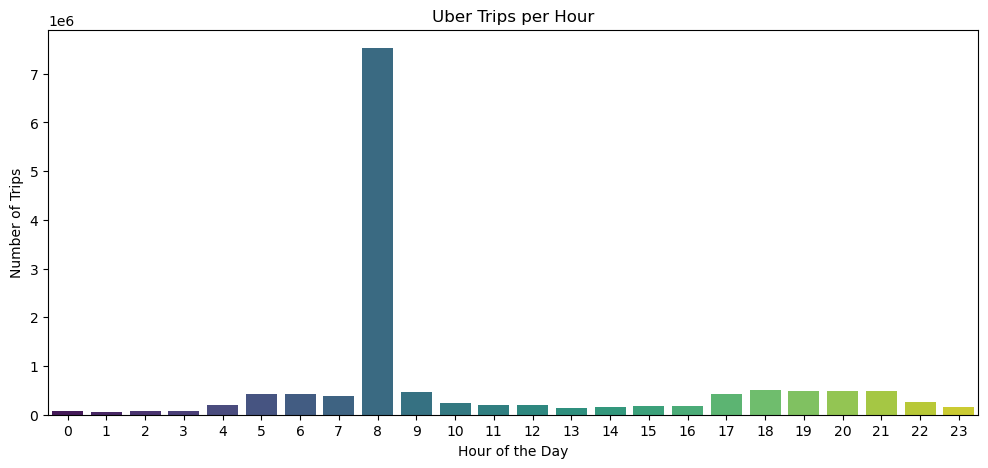

C:\Users\K A L K I D A N\AppData\Local\Temp\ipykernel_9912\423097478.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pickup point', data=merged_df, palette='coolwarm')


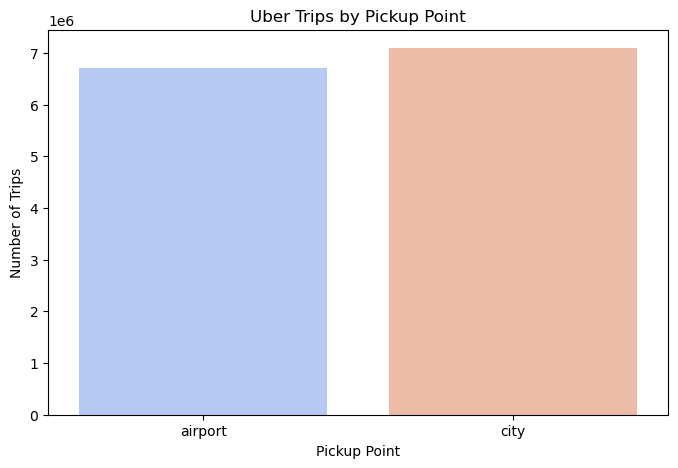

C:\Users\K A L K I D A N\AppData\Local\Temp\ipykernel_9912\423097478.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='peak_hour', data=merged_df, palette='Set2')


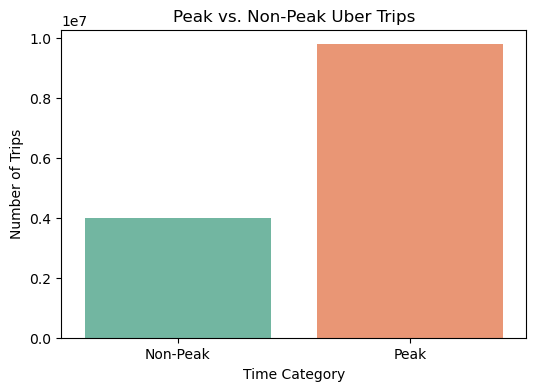

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot trip counts per hour
plt.figure(figsize=(12, 5))
sns.countplot(x='request_hour', data=merged_df, palette='viridis')
plt.title('Uber Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Plot trips by pickup point
plt.figure(figsize=(8, 5))
sns.countplot(x='Pickup point', data=merged_df, palette='coolwarm')
plt.title('Uber Trips by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Trips')
plt.show()

# Peak vs Non-Peak Hour trips
plt.figure(figsize=(6, 4))
sns.countplot(x='peak_hour', data=merged_df, palette='Set2')
plt.title('Peak vs. Non-Peak Uber Trips')
plt.xlabel('Time Category')
plt.ylabel('Number of Trips')
plt.show()


#####  2️⃣ Retail Sales Performance Analysis
##### We'll analyze:
##### ✅ Total revenue per hour, day, and month
##### ✅ Top customer segments (High Spenders, Regular, Low Spenders)
##### ✅ Top-selling countries

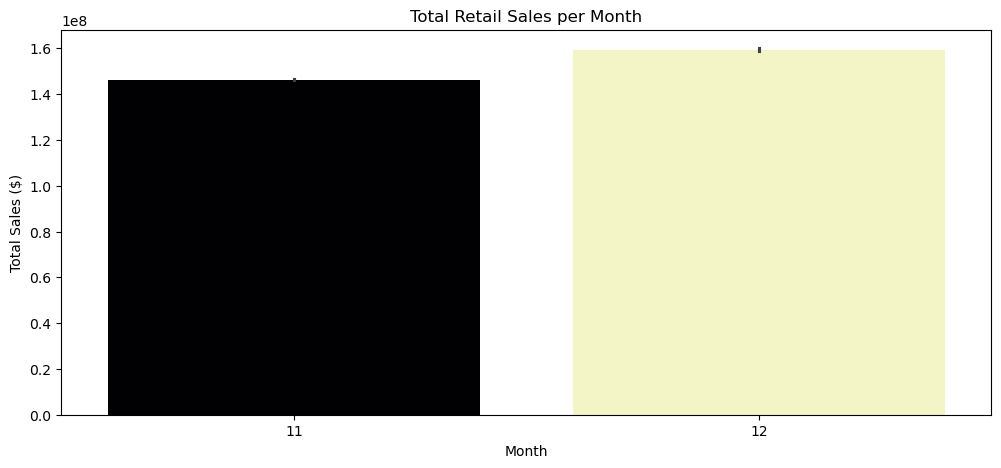

C:\Users\K A L K I D A N\AppData\Local\Temp\ipykernel_9912\350119965.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerSegment', data=merged_df, palette='Blues')


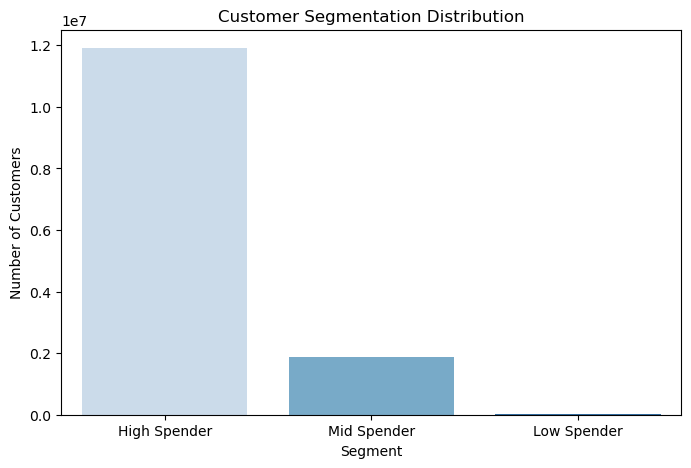

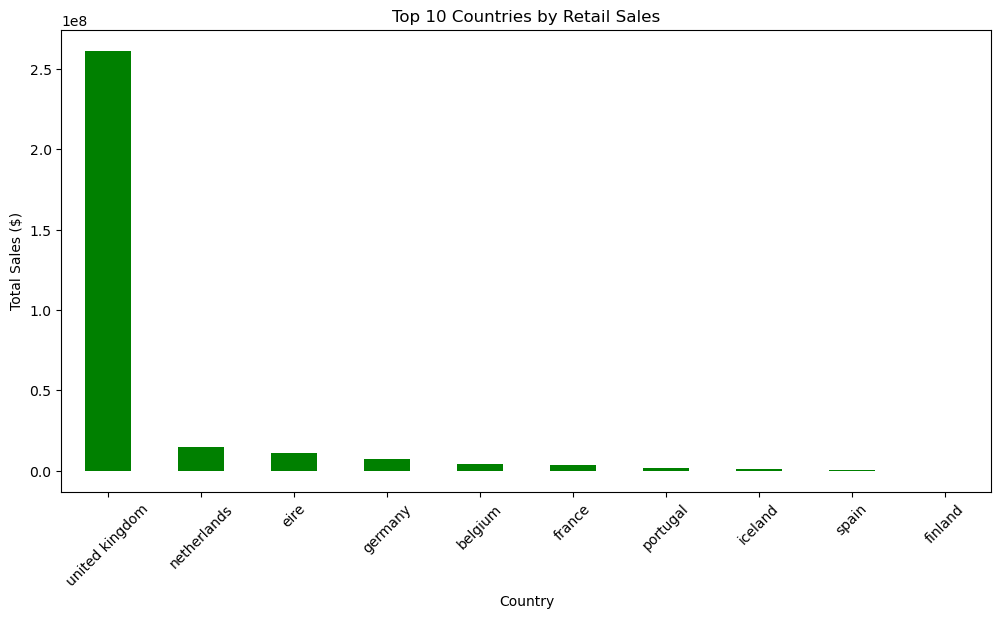

In [27]:
# Total sales per month
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x='invoice_month', y='TotalPrice', hue='invoice_month', data=merged_df, estimator=sum, palette='magma', legend=False)
plt.title('Total Retail Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

# Customer segmentation distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='CustomerSegment', data=merged_df, palette='Blues')
plt.title('Customer Segmentation Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Total sales by country (Top 10)
plt.figure(figsize=(12, 6))
top_countries = merged_df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Retail Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


In [28]:
print(merged_df.head())


   Request id Pickup point  Driver id          Status        request_time  \
0         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
2         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
3         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   
4         619      airport        1.0  Trip Completed 2016-11-07 11:51:00   

   request_hour  request_day  request_month peak_hour request_date  ...  \
0            11            7             11  Non-Peak   2016-11-07  ...   
1            11            7             11  Non-Peak   2016-11-07  ...   
2            11            7             11  Non-Peak   2016-11-07  ...   
3            11            7             11  Non-Peak   2016-11-07  ...   
4            11            7             11  Non-Peak   2016-11-07  ...   

  Quantity invoice_date UnitPrice  CustomerID         Country  invoice_hour  \
0      